Este colab fue adaptado por Arnold Charry y Valeria Palacio.

# Packer example

In [8]:
from rectpack import newPacker



rectangles = [
    (3073.0739135742188, 1851.681884765625),
	(437.0, 3903.0),
	(3848.6281204223633, 2285.76953125),
]
bins = [(10000, 10000)]

packer = newPacker(rotation=False)

# Add the rectangles to packing queue
for r in rectangles:
	packer.add_rect(*r)

# Add the bins where the rectangles will be placed
for b in bins:
	packer.add_bin(*b)

# Start packing
packer.pack()

In [9]:
# Obtain number of bins used for packing
nbins = len(packer)

# Index first bin
abin = packer[0]

# Bin dimmensions (bins can be reordered during packing)
width, height = abin.width, abin.height

# Number of rectangles packed into first bin
nrect = len(packer[0])


rect = packer[0][0]

# rect is a Rectangle object
x = rect.x # rectangle bottom-left x coordinate
y = rect.y # rectangle bottom-left y coordinate
w = rect.width
h = rect.height

In [10]:
recs = []

for abin in packer:
  print(abin.bid) # Bin id if it has one
  for rect in abin:
    print(rect)
    recs.append((rect.x, rect.y, rect.width, rect.height))

None
R(0, 0, 3848.6281204223633, 2285.76953125)
R(3848.6281204223633, 0, 3073.0739135742188, 1851.681884765625)
R(6921.702033996582, 0, 437.0, 3903.0)


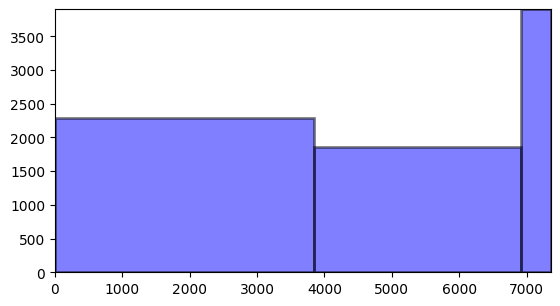

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_rectangles(rectangles, color='none'):
    """
    Plots a list of rectangles with the same fill color.
    
    Parameters:
    rectangles (list of tuples): Each tuple contains 4 elements representing the coordinates and size of a rectangle (x, y, width, height).
    color (str): The fill color for all rectangles.
    """
    fig, ax = plt.subplots()
    
    for rect in rectangles:
        # Unpack the rectangle coordinates and size
        x, y, width, height = rect
        
        # Create a rectangle patch
        rect_patch = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='black', facecolor=color, alpha=0.5)
        
        # Add the rectangle patch to the plot
        ax.add_patch(rect_patch)
    
    # Set the limits of the plot
    ax.set_xlim(0, max(x + width for x, y, width, height in rectangles))
    ax.set_ylim(0, max(y + height for x, y, width, height in rectangles))
    
    # Display the plot
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Example usage

plot_rectangles(recs, color='blue')